In [1]:
from bs4 import BeautifulSoup
from splinter import Browser
from webdriver_manager.chrome import ChromeDriverManager
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt


In [2]:
link = "https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html"

executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)
browser.visit(link)
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [3]:
rows = soup.find_all("tr", class_="data-row")
temp_data_lst = []

for row in rows:
    temp_dict = {}
    temp_dict["id"] = int(row.find("td").text)
    temp_dict["terrestrial_date"] = dt.datetime.strptime(row.find_next("td").find_next("td").text,"%Y-%m-%d")
    temp_dict["sol"] = int(row.find_next("td").find_next("td").find_next("td").text)
    temp_dict["ls"] = int(row.find_next("td").find_next("td").find_next("td").find_next("td").text)
    temp_dict["month"] = int(row.find_next("td").find_next("td").find_next("td").find_next("td").find_next("td").text)
    temp_dict["min_temp"] = float(row.find_next("td").find_next("td").find_next("td").find_next("td").find_next("td").find_next("td").text)
    temp_dict["pressure"] = float(row.find_next("td").find_next("td").find_next("td").find_next("td").find_next("td").find_next("td").find_next("td").text)
    temp_data_lst.append(temp_dict)


In [4]:
mars_temp_df = pd.DataFrame(temp_data_lst)
mars_temp_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [5]:
mars_temp_df.describe()

,id,sol,ls,month,min_temp,pressure
count,1867.000000,1867.000000,1867.000000,1867.000000,1867.000000,1867.000000
mean,955.551152,1015.670059,168.865024,6.141939,-76.121050,841.066417
std,545.048507,565.342298,105.599153,3.506493,5.504098,54.253226
min,2.000000,10.000000,0.000000,1.000000,-90.000000,727.000000
25%,489.500000,546.500000,78.000000,3.000000,-80.000000,800.000000
50%,959.000000,1028.000000,160.000000,6.000000,-76.000000,853.000000
75%,1425.500000,1505.500000,257.500000,9.000000,-72.000000,883.000000
max,1895.000000,1977.000000,359.000000,12.000000,-62.000000,925.000000


In [6]:
mnth = mars_temp_df["month"].max()
print(f"There are {mnth} months on Mars.")
# I'm assuming 'ls' is the martian date
days_on_mars = mars_temp_df["ls"].count()
print(f"A total of {days_on_mars} Martian days have been collected.")


There are 12 months on Mars.
A total of 1867 Martian days have been collected.


Text(0, 0.5, 'Average Temperature Cumulative Months')

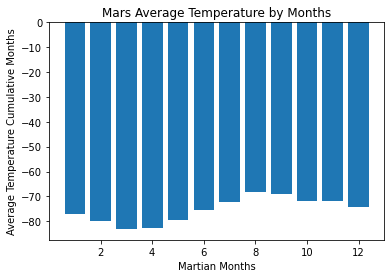

In [7]:
temp_by_month = mars_temp_df[["month","min_temp"]]
temp_by_month = temp_by_month['min_temp'].groupby(mars_temp_df["month"]).mean()
temp_by_month_df = pd.DataFrame(temp_by_month)
temp_by_month_df

plt.bar([1,2,3,4,5,6,7,8,9,10,11,12], temp_by_month_df["min_temp"])
plt.title("Mars Average Temperature by Months")
plt.xlabel("Martian Months")
plt.ylabel("Average Temperature Cumulative Months")


In [8]:
print("The third Martian month is the coldest.")
print("The eigth Martian month is the warmest.")

The third Martian month is the coldest.
The eigth Martian month is the warmest.


<BarContainer object of 12 artists>

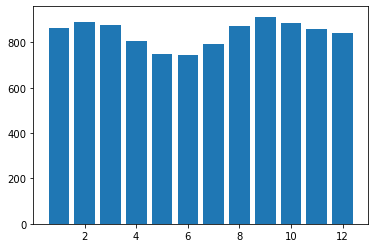

In [9]:
atmo_prssr = mars_temp_df[["month","pressure"]]
atmo_prssr_mnth_avg = atmo_prssr["pressure"].groupby(atmo_prssr["month"]).mean()
atmo_prssr_mnth_avg_df = pd.DataFrame(atmo_prssr_mnth_avg)
atmo_prssr_mnth_avg_df

plt.bar([1,2,3,4,5,6,7,8,9,10,11,12], atmo_prssr_mnth_avg_df["pressure"])

In [10]:
print("The sixth month has the lowest atmospheric pressure.")
print("The ninth month has the highest atmospheric pressure.")


The sixth month has the lowest atmospheric pressure.
The ninth month has the highest atmospheric pressure.


# Question 10

In [11]:
# earth_rprtd_temp = mars_temp_df[["terrestrial_date","min_temp"]]

# # solution found to get one earth year source:
# # https://stackoverflow.com/questions/29370057/select-dataframe-rows-between-two-dates
# # I'm basing the martian year off of the ls value when it's at 0, and when it's at the very last value of 359
# martian_year = (earth_rprtd_temp["terrestrial_date"] > "2013-8-1") & (earth_rprtd_temp["terrestrial_date"] <= "2015-6-18")
# martian_rprtd_tmp = earth_rprtd_temp.loc[martian_year]

# earth_year = (earth_rprtd_temp["terrestrial_date"] > "2013-1-1") & (earth_rprtd_temp["terrestrial_date"] <= "2013-12-31")
# earth_rprtd_tmp = earth_rprtd_temp.loc[earth_year]

# plt.figure(figsize=(10,5))
# plt.plot(martian_rprtd_tmp["terrestrial_date"], martian_rprtd_tmp["min_temp"])
# plt.xlabel("Martian Days")
# plt.ylabel("Martian Temperature")
# plt.legend(martian_rprtd_tmp)


In [12]:
# plt.figure(figsize=(10,5))
# plt.plot(earth_rprtd_tmp["terrestrial_date"], earth_rprtd_tmp["min_temp"])
# plt.xlabel("Martian Days")
# plt.ylabel("Martian Temperature")
# plt.legend('min_temp')

# Question 10 ver 2

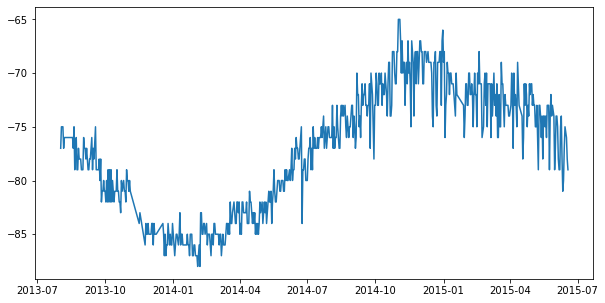

In [13]:
# solution found to get one earth year source:
# https://stackoverflow.com/questions/29370057/select-dataframe-rows-between-two-dates

combined = mars_temp_df[["terrestrial_date","month","min_temp"]]

# define a date period for the martian days
# which is the 12th month of the 359th martian day
martian_year = (combined["terrestrial_date"] > "2013-8-1") & (combined["terrestrial_date"] <= "2015-6-18")
martian_days_in_year = combined.loc[martian_year]

# define a date period for the earth day
# which is 2013-08-02 plus 365 days
earth_year = (combined["terrestrial_date"] >= "2013-8-2") & (combined["terrestrial_date"] <= "2014-8-1")
earth_days_in_year = combined.loc[earth_year]

plt.figure(figsize=(10,5))
plt.plot(martian_days_in_year['terrestrial_date'], martian_days_in_year['min_temp'])


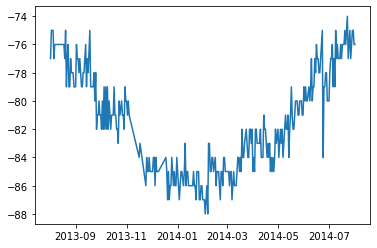

In [14]:
plt.plot(earth_days_in_year['terrestrial_date'], earth_days_in_year['min_temp'])

In [19]:
print("Disclosure: a few days are missing in the terrestrial_days column.")
print("An example would be from 2013-08-03 jumps to 2013-08-17")
earth_days_len = len(earth_days_in_year)
martian_days_len = len(martian_days_in_year)
print(f"This means that there are a total of {earth_days_len} Earth days in a year.")
print(f"This also means that there are a total of {martian_days_len} Martian days in a year.")
print()
difference = martian_days_len - earth_days_len
print(f"Mars has {difference} days more than Earth.")

Disclosure: a few days are missing in the terrestrial_days column.
An example would be from 2013-08-03 jumps to 2013-08-17
This means that there are a total of 322 Earth days in a year.
This also means that there are a total of 620 Martian days in a year.

Mars has 298 days more than Earth.


In [16]:
# 11. Export to CSV.

mars_temp_df.to_csv("mars_temp.csv", index=False)